In [3]:
import sys
sys.path.append("../tibet_snow_man")
#from generate_grid_and_area import grid_and_area
#from generate_grid_and_area import grid_and_area
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
%matplotlib inline
import datetime
import pdb
import seaborn as sns
import matplotlib
from matplotlib import rc
from matplotlib import rcParams
import matplotlib.ticker as mtick
rc('text', usetex=False)
rcStyle = {"font.size": 10,
           "axes.titlesize": 14,
           "axes.labelsize": 14,
           'xtick.labelsize': 10,
           'ytick.labelsize': 10}
sns.set_context("paper", rc=rcStyle)
sns.set_style("whitegrid", {'axes.grid' : False})
myColors = ["windows blue", "amber", "dusty rose", "greyish", "faded green", "dusty purple"]
colorsBW = ["black", "grey"]
sns.set_palette(sns.xkcd_palette(myColors))

In [4]:
matplotlib.matplotlib_fname()
rc('figure', dpi = 300)

In [5]:
home_dir = os.getcwd()
data_dir = os.path.join(home_dir,os.pardir,'tibet_snow_man','data')
no_snow_planet_name = 'dry_planet_24km.asc'
lat_grid_filename = 'imslat_24km.bin'
lon_grid_filename = 'imslon_24km.bin'
grid_size = 1024
lat_long_coords_filtered = {'lower_lat': 35,
                            'upper_lat': 36,
                            'lower_long': 85,
                            'upper_long': 86} #set as lower and upper bounds for lat and long
lat_long_coords = {'lower_lat': 25,
                   'upper_lat': 45,
                   'lower_long': 65,
                   'upper_long': 105}

In [6]:
grid_maker = grid_and_area(lat_long_coords, data_dir, no_snow_planet_name, grid_size)
grid_maker.addLatLong(lat_grid_filename, lon_grid_filename)
grid_maker.reduceLatLong()
grid_maker.makeNoSnowMap()

#tibet falls approximatly in this region.
grid_maker.addAreas()

df_whole = grid_maker.df
df_whole.reset_index(level = df_whole.index.names, inplace=True)

backdrop0 = grid_maker.rbg_no_snow_matrix


fig_size = (3,3)
plt.rcParams["figure.figsize"] = fig_size
fig0 = plt.figure(0)
ax0 = plt.axes()

ax0.set_xlabel('Column')
ax0.set_ylabel('Row')
#plt.setp(ax0.get_xticklabels(), ax0.tick_top())
#plt.setp(ax0.tick_top())
plt.setp(ax0.get_yticklabels(), fontsize=10)
ax0.xaxis.tick_top()
ax0.xaxis.set_label_position('top') 
ax0.imshow(backdrop0)
ax0.set_xlim([0,1024])
ax0.set_ylim([1024,0])

tilt = 46
ax0.plot([0, 1024], [512-tilt,512+tilt], linewidth = 2, c='r')
ano_text = 'latitude = '+str(round(df_whole[df_whole['col'] == 512-tilt]['long'].mean()-90,1))+' deg'
ax0.annotate('Prime Meridian', color = 'r',fontsize=12, xy=(700, 532), xytext=(420, 300),
            arrowprops=dict(facecolor='red', shrink=0.01),
            bbox={'facecolor':'white', 'alpha':.8, 'pad':10},
            )
plt.show()

NameError: name 'grid_and_area' is not defined

In [7]:
lat_long_area_filename_24 = 'tibet_lat_long_centroids_area_24km.csv'
df_24km = pd.read_csv(os.path.join(data_dir, lat_long_area_filename_24), index_col=(0,1))
#make map
def plot_points_on_basemap(filename,df, lat_long_coords, show = True, save = True,width = 4500000,height = 4000000):

    #make map
    fig = plt.figure(0)
    long_center, lat_center = ((lat_long_coords['upper_long']-lat_long_coords['lower_long'])/2+lat_long_coords['lower_long'],(lat_long_coords['upper_lat']-lat_long_coords['lower_lat'])/2+lat_long_coords['lower_lat'])
    
    m = Basemap(projection='laea',
                width = width,
                height = height,
                resolution='c',lat_0=lat_center,lon_0=long_center)
    
    x, y = m(df['long'].values.tolist(), df['lat'].values.tolist()) # this function converts degrees to meters on this reference map

    m.scatter(x, y, marker='.',color='cyan', alpha=.1)

    m.bluemarble()
    return m

    

fig2 = plt.figure(2)
filename = 'Tibet-24km'
m = plot_points_on_basemap(filename,df_24km,
                           lat_long_coords,
                           show = True,
                           save = False,
                           width = 4500000,
                           height = 4000000)
plt.show()


FileNotFoundError: File b'/home/tyler/Desktop/thesis/ch2Code/../tibet_snow_man/data/tibet_lat_long_centroids_area_24km.csv' does not exist

In [61]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from IPython.core.display import display, HTML
# The polling here is to ensure that plotly.js has already been loaded before
# setting display alignment in order to avoid a race condition.
display(HTML(
    '<script>'
        'var waitForPlotly = setInterval( function() {'
            'if( typeof(window.Plotly) !== "undefined" ){'
                'MathJax.Hub.Config({ SVG: { font: "STIX-Web" }, displayAlign: "center" });'
                'MathJax.Hub.Queue(["setRenderer", MathJax.Hub, "SVG"]);'
                'clearInterval(waitForPlotly);'
            '}}, 250 );'
    '</script>'
))

def make_whole_area_text(X):
    return 'Area: %s km^2\
    <br>row: %s\
    <br>column: %s\
    <br>lat: %s\
    <br>long: %s\
    <br>id: %s'\
    % (round(X['area'],2), X['row'], X['col'],round(X['lat'],3),round(X['long'],3),X['id']) 

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[0,"rgb(220, 220, 220)"] ]
trace = go.Scattergl(
        x = df_whole['long'],
        y = df_whole['lat'],
        text = df_whole.apply(lambda x: make_whole_area_text(x), axis=1),
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'dot',
            line = dict(
                width=0,
                color='rgba(102, 102, 102)'),
            colorscale = scl,
            cmin = df_whole['area'].min(),
            color = df_whole['area'],
            cmax = df_whole['area'].max(),
            colorbar=dict(
                title="Km^2")
            )
        )

data = [trace]
layout = dict(
        autosize=False,
        width=500,
        height=500,
        hovermode=False,
        title = 'Areas of TP grid boxes \n according to lat-lon grid',
        titlefont=dict(
            size=16,
            ),
        colorbar = True,  
        xaxis=dict(
        title='Longitude [deg]',
        titlefont=dict(
            size=16
            ),
            tickfont=dict(
                size = 12
            ),
        ),
        yaxis=dict(
            title='Latitude [deg]',
            titlefont=dict(
                size=16
                ),
            tickfont=dict(
                size = 12
                ),
            ),
        )
    

fig3 = dict( data=data, layout=layout )
plot_url = iplot(fig3, validate=False)

NameError: name 'df_whole' is not defined

I also added the plot that goes by row and column.

In [62]:
#%% Figure1
#zoom-in-area
zoom = (600,900,200,600)
backdrop = grid_maker.rbg_no_snow_matrix[zoom[0]:zoom[1],zoom[2]:zoom[3],:]
#plot of points of interest

llm_x=df_whole['col'].values-zoom[2]
llm_y=df_whole['row'].values-zoom[0]

fig_size = (3.5,3.5)
plt.rcParams["figure.figsize"] = fig_size

# Two subplots, the axes array is 1-d
#fig1 = plt.figure(1, figsize = (8,5))
fig1 = plt.figure(1)


ax1 = plt.axes()
plt.setp(ax1.get_xticklabels(), rotation='vertical')
#plt.setp(ax1.get_yticklabels(), fontsize=14)


#plt.figure(1, figsize=(12,5))
#ax1 = plt.subplot(1,2,1)
ax1.imshow(backdrop)
ax1.set_title('Tibetan Plateau region \n embedded in projection grid')
ax1.set_xlabel('Column')
ax1.set_ylabel('Row')
ax1.set_xticklabels([200,250,300,350,400,450,500,550,600])
ax1.set_yticklabels([600,650,700,750,800,850,900])
#rcParams.update({'font.size': 52})
ax1.scatter(llm_x,llm_y, c='w', s=10, marker = 'o',facecolor='0.5', lw = 0)
,
ax1.annotate('Lon = 65$^{\circ}$', color = 'r', fontsize=10, xy=(150, 150), xytext=(140, 110),
            rotation=55)
ax1.annotate('Lon = 105$^{\circ}$', color = 'r', fontsize=10, xy=(150, 150), xytext=(315, 145),
            rotation=95)

ax1.annotate('Lat = 25$^{\circ}$', color = 'r', fontsize=10, xy=(150, 150), xytext=(200, 210),
            rotation=345)
ax1.annotate('Lat = 45$^{\circ}$', color = 'r', fontsize=10, xy=(150, 150), xytext=(220, 115),
            rotation=343)
ax1.axis([0,400,300,0])
#ax1.grid(True)
plt.show()

NameError: name 'grid_maker' is not defined

In [63]:
trace = go.Scattergl(
        x = df_whole['col'],
        y = df_whole['row'],
        text =df_whole.apply(lambda x: make_whole_area_text(x), axis=1),
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'dot',
            line = dict(
                width=0,
                color='rgba(102, 102, 102)'),
            colorscale = scl,
            cmin = df_whole['area'].min(),
            color = df_whole['area'],
            cmax = df_whole['area'].max(),
            colorbar=dict(
                title="Km^2",
                #x=-.5
                )
            )
        )

data = [trace]
layout = dict(
        autosize=False,
        width=550,
        height=400,
        hovermode=False,
        title = 'Areas of TP grid boxes \n according to projection grid',
        titlefont=dict(
            size=16,
            ),
        colorbar = True,  
        xaxis=dict(
            title='Column',
            autorange=True,
            showgrid=False,
            zeroline=False,
            showline=False,
            autotick=True,
            ticks='',
            showticklabels=True
            ),
        #autorange='reversed' #flip correctly

        yaxis=dict(
            title='Row',
            autorange='reversed',
            showgrid=False,
            zeroline=False,
            showline=False,
            autotick=True,
            ticks='',
            showticklabels=True,
            ),
        )
    

fig3p2 = dict( data=data, layout=layout )
plot_url = iplot(fig3p2, validate=False)

NameError: name 'df_whole' is not defined

In [64]:
lat_long_coords_zoomed = {'lower_lat': 35,
                          'upper_lat': 36,
                          'lower_long': 85,
                          'upper_long': 86} #set as lower and upper bounds for lat and long
grid_maker_zoomed = grid_and_area(lat_long_coords_zoomed,data_dir,no_snow_planet_name,grid_size)
grid_maker_zoomed.addLatLong(lat_grid_filename,lon_grid_filename)
grid_maker_zoomed.reduceLatLong()
grid_maker_zoomed.makeNoSnowMap()

grid_maker_zoomed.addAreas()
df_zoomed = grid_maker_zoomed.df

df_zoomed.reset_index(level = df_zoomed.index.names, inplace=True)

NameError: name 'grid_and_area' is not defined

In [65]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[0,"rgb(220, 220, 220)"] ]

def make_area_text(X):
    return 'Area: %s km^2\
    <br>row: %s\
    <br>column: %s\
    <br>id: %s'\
    % (round(X['area'],2), X['row'], X['col'], X['id'])  
    
def make_centroids_text(X):
    return 'row: %s\
    <br>column: %s\
    <br>id: %s'\
    % (X['row'], X['col'], X['id'])  

centroid_df = df_zoomed[df_zoomed['row'] < 765]
area_df = centroid_df[centroid_df['row'] > 760]
centroid_df = centroid_df[ centroid_df['col'] > 444]
area_df = area_df[ area_df['col'] > 445]

trace0 = Scatter(
    name = 'grid points',
    y=area_df['lat'],
    x=area_df['long'],
    mode = 'markers',
    text =df_zoomed.apply(lambda x: make_area_text(x), axis=1),
    marker = dict( 
        size = 8, 
        opacity = 0.8,
        reversescale = True,
        autocolorscale = False,
        showscale=False,
        symbol = 'dot',
        line = dict(
            width=0,
            color='rgba(102, 102, 102)'),
        colorscale = scl,
        cmin = df_zoomed['area'].min(),
        color = df_zoomed['area'],
        cmax = df_zoomed['area'].max(),
        colorbar=dict(
            title="Km^2")
        )
    )
trace1 = Scatter(
    name = 'cell corners',
    y=centroid_df['centroid_lat'],
    x=centroid_df['centroid_long'],
    #text = df[ ['row', 'col']].values,
    #text = df['row'],
    text = centroid_df.apply(lambda x: make_centroids_text(x), axis = 1),
    mode = 'markers',
    #hoverinfo = "none",
)


def get_centroid_coords(area_indexes, centroid_df):
    coords = []    
    df = centroid_df.set_index(['col', 'row'])[ ['centroid_lat', 'centroid_long'] ]
    for idx in area_indexes:
        col, row = idx
        item = [(df.ix[ (col-1,row)]['centroid_long'], df.ix[ (col-1,row)]['centroid_lat']),
                (df.ix[ (col,row)]['centroid_long'], df.ix[ (col,row)]['centroid_lat']),
                (df.ix[ (col,row-1)]['centroid_long'], df.ix[ (col,row-1)]['centroid_lat']),
                (df.ix[ (col-1,row-1)]['centroid_long'], df.ix[ (col-1,row-1)]['centroid_lat'])]
        coords.append(item)
    coords = np.array(coords)  
    return coords
# get col and row indexes from area_df
area_indexes = area_df[['col', 'row']].values
# return a list containing the centroid coordinates
centroid_polygons = get_centroid_coords(area_indexes, centroid_df)

# make polygon traces out of each centroid_polygons
def make_scatter(x,y):
    return Scatter(
        x=np.append(x,x[0]),
        y=np.append(y,y[0]),
        name = 'cell boundary',
        mode='lines',
        line=dict(
        color='rgba(143, 19, 131, .5)',
        ),
        fill='none',
        fillcolor = "none",
        showlegend=False,
        hoverinfo = "none"
        )


traces= list(map( lambda pt: make_scatter(pt[:,0], pt[:,1]), centroid_polygons))
traces[0]['showlegend'] = False
traces.append(trace0)
traces.append(trace1)
data = Data(traces)


layout = dict(
    autosize=False,
    width=550,
    height=400,
    hovermode=False,
    title='Zoom in view of grid boxes',
    titlefont=dict(
        size=16,
        ),
    xaxis=dict(
        title='Longitude',
        showgrid=False,
        titlefont=dict(
            size=16
            ),
        tickfont=dict(
            size = 12
            ),
        ),
    yaxis=dict(
        title='Latitude',
        showgrid=False,
        titlefont=dict(
            size=16
            ),
        tickfont=dict(
            size = 12
            ),
        ),
    showlegend = False,
    legend=dict(
        x = .82,
        y = 1),
        #orientation= "h"),
    )
    
    
fig4 = {
    'data': data,
    'layout': layout,
}

iplot(fig4, filename = 'grid')

NameError: name 'df_zoomed' is not defined

In [66]:
def make_annotation(x,y,snow_bool):

    if snow_bool:
        text = '<b>1</b>'
    else:
        text = '<b>0</b>'

    annotation = dict(
            x=x-.025,
            y=y+.025,
            xref='x',
            yref='y',
            text=text,
            showarrow=False,
            font=dict(
                family='arial',
                bold=True,
                size=16,
                bgcolor='rgba(5,5,5,1)')
        )
    return annotation

fig5 = fig4

fig5['layout']['colorbar'] = False,
fig5['layout']['title'] = 'Zoom in view of grid boxes \n showing data'
snow_bools = [True] * 5 + [False] * 15   
annotations = list(map( lambda pt: make_annotation(pt[0], pt[1], False), area_df[['long', 'lat']].values))
fig5['layout']['annotations'] = annotations


def make_poly(x,y, snow_bool):
     # filled Polygon
    line_color = 'rgba(0, 0, 0,1)'
    if snow_bool:
        color = 'rgba(5,5,5,1)'
    else:
        color = 'rgba(0,128,0,1)'
    
    shape = {
        'type': 'path',
        'path': ' M'+str(x[0])+','+str(y[0])+'L'+str(x[1])+','+str(y[1])+'L'+str(x[2])+','+str(y[2])+'L'+str(x[3])+','+str(y[3])+'Z',
        'fillcolor': color,
        'line': {
            'color': line_color,
        },
    }
    
    return shape

def get_centroid_coords(area_indexes, centroid_df):
    coords = []    
    snow_bool = [True] * 10 + [False] * 10
    df = centroid_df.set_index(['col', 'row'])[ ['centroid_lat', 'centroid_long'] ]
    for idx in area_indexes:
        col, row = idx
        item = [(df.ix[ (col-1,row)]['centroid_lat'], df.ix[ (col-1,row)]['centroid_long']),
                (df.ix[ (col,row)]['centroid_lat'], df.ix[ (col,row)]['centroid_long']),
                (df.ix[ (col,row-1)]['centroid_lat'], df.ix[ (col,row-1)]['centroid_long']),
                (df.ix[ (col-1,row-1)]['centroid_lat'], df.ix[ (col-1,row-1)]['centroid_long'])]
        coords.append(item)
    coords = np.array(coords)  
    return coords

#get col and row indexes from area_df
area_indexes = area_df[['col', 'row']].values
#return a list containing the centroid coordinates
centroid_polygons = get_centroid_coords(area_indexes, centroid_df)


poly_traces = list(map( lambda pt: make_poly(pt[:,1], pt[:,0], False), centroid_polygons))
                
for i, snow_bool in enumerate(snow_bools):
    if snow_bool:
        poly_traces[i]['fillcolor'] = 'rgba(255,255,255,1)'
        poly_traces[i]['line']['color'] = 'rgba(0,0,0,1)'
        annotations[i]['text'] = '<b>1</b>'

fig5['layout']['annotations'] = annotations
fig5['layout']['shapes'] = poly_traces
#fig['layout'].update(traces=traces)
iplot(fig5, filename = 'grid',validate=False)

NameError: name 'fig4' is not defined

In [8]:
equal_area_filename =  os.path.join(os.getcwd(),
                                    'compare_timeseries',
                                    '24_km_false_coverage.csv')
df_ea = pd.read_csv(equal_area_filename)
df_ea.rename(index=str, columns={u'perc coverage': '24_perc_ea',
                                 u'coverage (km^2)': '24km_cov_ea'},
             inplace = True)
df_ea.index = pd.to_datetime(df_ea['timestamp'],
                             format='%Y-%m-%d')
# remove missing days
df_ea = df_ea[df_ea['24km_cov_ea'] != 0]
# remove outlier
df_ea.drop(pd.Timestamp('2014-12-03'), inplace=True)
df_ea.drop(pd.Timestamp('2014-12-04'), inplace=True)

In [9]:
filename_24km = os.path.join(os.getcwd(),
                             'compare_timeseries',
                             '24_km.csv')
df_24 = pd.read_csv(filename_24km, index_col='timestamp')
df_24.rename(index=str, columns={u'perc coverage': '24_perc',
                                 u'coverage (km^2)': '24km_cov'},
             inplace = True)
df_24.index = pd.to_datetime(df_24.index, format='%Y-%m-%d')
# remove missing days
df_24 = df_24[df_24['24km_cov'] != 0]
# remove outlier
df_24.drop(pd.Timestamp('2014-12-03'), inplace=True)
df_24.drop(pd.Timestamp('2014-12-04'), inplace=True)
# make dates with no missing days
idx_24 = pd.date_range(df_24.index.min(), df_24.index.max())
# redindex df_24 dataframe and fill missing values with -999
df_24_re = df_24.reindex(idx_24, fill_value = -999)
# create a series of missing datapoints
s_missing_24 = pd.Series(0, index=df_24_re[df_24_re['24_perc'] == -999].index)

filename_4km = os.path.join(os.getcwd(),
                            'compare_timeseries',
                            '4_km.csv')
df_4 = pd.read_csv(filename_4km,index_col='timestamp')
df_4.rename(index=str, columns={'perc coverage': u'4_perc',
                                u'coverage (km^2)': '4km_cov'},
            inplace=True)
df_4.index = pd.to_datetime(df_4.index, format='%Y-%m-%d')
# remove missing data
df_4 = df_4[df_4['4km_cov'] != 0]
# remove outlier
df_4.drop(pd.Timestamp('2005-02-10'), inplace=True)
df_4.drop(pd.Timestamp('2004-11-12'), inplace=True)
# make dates with no missing days
idx_4 = pd.date_range(df_4.index.min(), df_4.index.max())
# redindex df_24 dataframe and fill missing values with -999
df_4_re = df_4.reindex(idx_4, fill_value = -999)
# create a series of missing datapoints
s_missing_4 = pd.Series(0, index=df_4_re[df_4_re['4_perc'] == -999].index)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


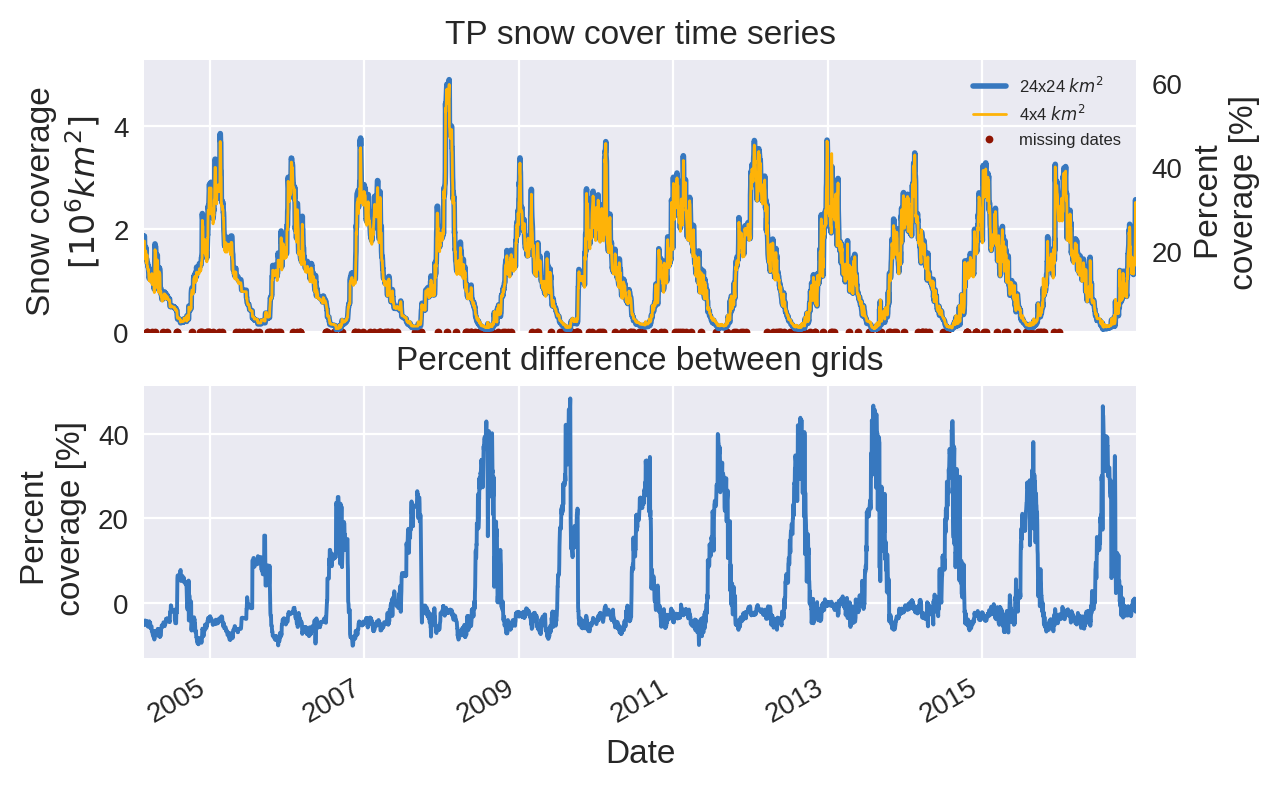

In [10]:
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 3.5)
sns.set()
rc('text', usetex=False)
rc('figure', dpi=200)
rcStyle = {"font.size": 10,
           "axes.titlesize": 12,
           "axes.labelsize": 12,
           'xtick.labelsize': 10,
           'ytick.labelsize': 10}
sns.set_context("paper", rc=rcStyle)
my_colors = ["windows blue", "amber", "dusty rose", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(my_colors))
percFontsize = 12
lableFontsize = 12
# plot 24 and 4 grids side by side
df_new = pd.concat([df_24, df_4], axis=1, join='inner')
# make dates with no missing days
idx_new = pd.date_range(df_new.index.min(), df_new.index.max())
# redindex df_24 dataframe and fill missing values with -999
df_new_re = df_new.reindex(idx_new, fill_value=-999)
# create a series of missing datapoints
s_missing_new = pd.Series(0, index=df_new_re[df_new_re['4_perc'] == -999].index)

fig6, axes6 = plt.subplots(nrows=2, ncols=1, sharex=True)

axes6[0].plot(df_24.index.values,df_24['24km_cov'].values/(10**6), linewidth=2)
axes6[0].plot(df_4.index.values,df_4['4km_cov'].values/(10**6), linewidth=1)
axes6[0].set_title('TP snow cover time series')
axes6[0].set_ylabel('Snow coverage \n $[10^{6} km^{2}]$')
axes6[0].set_ylim([0,df_4['4km_cov'].max()*1.1/(10**6)])
axes6[0].set_xlim([df_new.index.min(),df_new.index.max()])
axes6[0].set_xlabel(r'Date')
axes6[0].scatter(s_missing_new.index, s_missing_new, marker = '.', linewidths=0, c='#8f1402')
right_ax6 = axes6[0].twinx()
right_ax6.set_ylim([df_4['4_perc'].min() * 100,df_4['4_perc'].max() * 110])
right_ax6.set_ylabel('Percent \n coverage [%]')
right_ax6.grid(False)
axes6[0].legend([r'24x24 $km^{2}$',
                 r'4x4 $km^{2}$',
                 'missing dates'], loc=1, fontsize = 6)
tibet_area = 8059061.81949 #calculated via haversine
resolution_diff = np.subtract(df_new['4km_cov'].values, df_new['24km_cov'].values)
resolution_perc_diff = 100 * np.divide(resolution_diff, df_new['4km_cov'].values)

df_new['perc_diff'] = resolution_perc_diff
df_new['perc_diff'].plot(ax=axes6[1])
axes6[1].set_title('Percent difference between grids')
axes6[1].set_ylabel('Percent \n coverage [%]')
axes6[1].set_xlabel(r'Date')
axes6[1].set_xlim([df_new.index.min(), df_new.index.max()])

rcTimeSeries = {"font.size": lableFontsize,
                "axes.titlesize": lableFontsize,
                "axes.labelsize": lableFontsize,
                'xtick.labelsize': 10,
                'ytick.labelsize': 10}
sns.set_context("paper", rc=rcTimeSeries)

df_4['timestamp'] = df_4.index
df_4.index = pd.to_datetime(df_4['timestamp'], format='%Y-%m-%d')
df_4['timestamp'] = pd.to_datetime(df_4['timestamp'], format='%Y-%m-%d').astype(int).astype(float).values
y_4=df_4['4km_cov']
x_4=df_4['timestamp']

In [11]:
print('max: {}'.format(df_new['perc_diff'].max()))
print('min: {}'.format(df_new['perc_diff'].min()))
df_new[ df_new['perc_diff'] == df_new['perc_diff'].max()]

max: 48.42278870540903
min: -10.124046090818211


24_perc     24km_cov    4_perc       4km_cov  perc_diff
timestamp                                                          
2009-09-01  0.00537  43296.70168  0.010413  83945.410373  48.422789

In [12]:
df_new[ df_new['perc_diff'] == df_new['perc_diff'].min()]

24_perc      24km_cov    4_perc        4km_cov  perc_diff
timestamp                                                             
2006-11-06  0.127819  1.030579e+06  0.116084  935834.566122 -10.124046

In [13]:
print('min date: {}'.format(df_new['perc_diff'].index.min()))
print('max date: {}'.format(df_new['perc_diff'].index.max()))

min date: 2004-02-24 00:00:00
max date: 2016-12-31 00:00:00


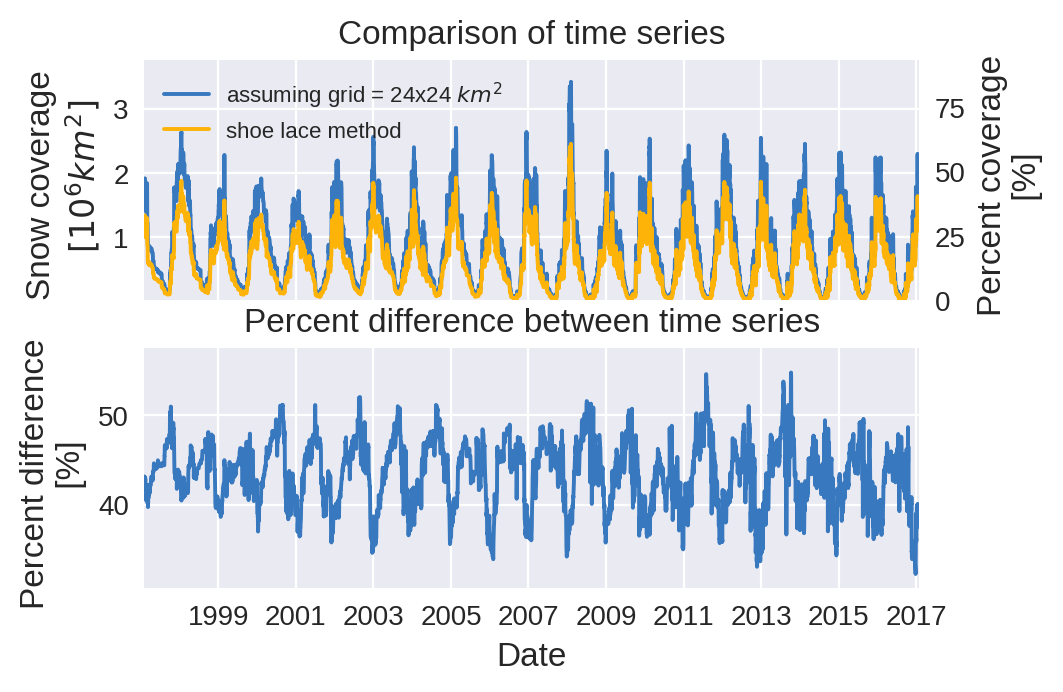

In [15]:
#plot old and new
pylab.rcParams['figure.figsize'] = (5, 3.5)
df_ea_and_new = pd.concat([df_ea, df_24], axis = 1, join = 'inner')
fig7, axes7 = plt.subplots(nrows=2, ncols=1, sharex=True)

axes7[0].plot(df_ea_and_new.index.values,df_ea_and_new['24km_cov_ea'].values)
axes7[0].plot(df_ea_and_new.index.values,df_ea_and_new['24km_cov'].values)
axes7[0].set_title('Comparison of time series')
axes7[0].set_ylabel('Snow coverage \n $[10^{6} km^{2}]$')
axes7[0].set_xlim([df_ea_and_new['24km_cov_ea'].index.min(),df_ea_and_new['24km_cov_ea'].index.max()])
axes7[0].set_ylim([df_ea_and_new['24km_cov_ea'].min(),df_ea_and_new['24km_cov_ea'].max()*1.1])
axes7[0].legend(['assuming grid = 24x24 $km^{2}$','shoe lace method'], loc=2, fontsize = 8)

#need to reset tick lables to match units
tick_labels = map(lambda x: str(x), range(0,8))
axes7[0].set_yticklabels(tick_labels)
right_ax7 = axes7[0].twinx()

right_ax7.set_ylabel('Percent coverage \n [%]')
right_ax7.set_ylim([0,df_ea_and_new['24km_cov_ea'].max()/tibet_area*100*1.1])
right_ax7.grid(False)

diff = np.subtract(df_ea_and_new['24km_cov_ea'].values, df_ea_and_new['24km_cov'].values)
perc_diff = 100 * np.divide( diff ,df_ea_and_new['24km_cov'].values)
df_ea_and_new['perc_diff'] = perc_diff
#df_ea_and_new['perc_diff'].plot(ax=axes7[1])
axes7[1].plot(df_ea_and_new['perc_diff'].index.values,df_ea_and_new['perc_diff'].values)
axes7[1].set_ylim([df_ea_and_new['perc_diff'].min()*.95,df_ea_and_new['perc_diff'].max()*1.05])
axes7[1].set_title('Percent difference between time series')
axes7[1].set_ylabel('Percent difference \n [%]')
axes7[1].set_xlabel(r'Date')

In [78]:
print('min date: {}'.format(df_ea_and_new['perc_diff'].index.min()))
print('max date: {}'.format(df_ea_and_new['perc_diff'].index.max()))

min date: 1997-02-04 00:00:00
max date: 2017-01-28 00:00:00


In [79]:
from scipy.stats import ols

ImportError: cannot import name 'ols'

In [80]:
BW_colors = ["grey", "black"]
Sams_colors = ["windows blue", "red"]
sns.set_palette(sns.xkcd_palette(Sams_colors))
sns.set_style("whitegrid", {'axes.grid' : False})
from scipy import stats
from scipy import signal
import statsmodels.api as sm

class timeseries_report:
    """
    creates climate averaged table and stats info
    """
    def __init__(self,series_name,df, outlier_dates):
        self.series_name = series_name #used when saving files
        df.rename(index=str, columns={u'24km_cov': 'coverage', '24_perc': 'perc coverage'}, inplace = True)
        df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
        df = df[df['coverage'] != 0] #removes bad dates
        df = df[~((df.index.month == 2) & (df.index.day == 29))] #remove leap days
        for date in outlier_dates:
            df.drop(pd.Timestamp(date), inplace=True) #remove outliers
        self.df = df
        self.clim = self.get_climate_df(period = 5)
        self.df_out = self.merge_df()
        self.df_cont_out = self.merge_continuous_continuous_climate_df()
        self.make_anomalies()
        self.make_yearly_mean()
        self.do_stats()
        
    def save_data(self):
        #save csv's and plots
        if not os.path.exists(self.series_name):
            os.mkdir(self.series_name)
        self.clim.to_csv(os.path.join(self.series_name,self.series_name+'-annual_expected_coverage.csv'))
        self.df_out.to_csv(os.path.join(self.series_name,self.series_name+'-averaged.csv'))
        
    def get_climate_df(self, period = 5):
        #adding columns used to get yearly averages
        df=self.df
        df['dayofyear'] = df.index.dayofyear
        is_leap_year = lambda x: x.year % 4 == 0
        df['is_leap_year'] = list(map(is_leap_year, df.index))
        
        #split into leap years and non leap years.
        df_ly = df[df['is_leap_year'] == True]
        df_y = df[df['is_leap_year'] == False]
        
        
        #make timeseries with periods of every n days
        n_rows = int(np.floor(365/period))
        #todo: make so that you dont have this be a factor of of 365
        
        y = np.array_split(pd.date_range('1999-01-01', '1999-12-31').dayofyear, n_rows)
        ly = np.array_split(pd.date_range('2000-01-01', '2000-12-31').drop(pd.Timestamp('2000-02-29')).dayofyear, n_rows)
        
        #group dataframes into 5 day periods
        climate_function_y = lambda x: df_y[ df_y['dayofyear'].isin(x)]
        climate_maps_y = list(map(climate_function_y, y))
        
        #leap days have different days of the year after feb 2nd. 
        climate_function_ly = lambda x: df_ly[ df_ly['dayofyear'].isin(x)]
        climate_maps_ly = list(map(climate_function_ly, ly))
        
        #add each group together
        concat_climates = lambda x: pd.concat([climate_maps_ly[x], climate_maps_y[x]])
        climate_maps = list(map(concat_climates, np.arange(0,n_rows)))
        
        #collect parameters
        rowSums = list(map(lambda x: x['coverage'], map(lambda x: x.sum(),climate_maps)))
        rowMean = list(map(lambda x: x['coverage'], map(lambda x: x.mean(),climate_maps)))
        rowStd = list(map(lambda x: x['coverage'], map(lambda x: x.std(),climate_maps)))
        rowCounts = list(map(lambda x: x['coverage'], map(lambda x: x.count(),climate_maps)))
        
        #create dataframe to house parameters for each 5 day period
        df_climate = pd.DataFrame()
        df_climate['days'] = list(map(lambda x: str(x[0])+'-'+str(x[-1]),y))
        df_climate['first_day'] = list(map(lambda x: x[0],y))
        df_climate['sums'] = rowSums
        df_climate['mean'] = rowMean
        df_climate['std'] = rowStd
        df_climate['counts'] = rowCounts
        df_climate['dayofyear'] = list(map(lambda x: x[0],y))
        
        return df_climate
        
    def merge_df(self,period=5):
        """
        does a tricky merge involving a group on day of year. 
        1. append data for the df_climate so that it has the same length as df
        2. inner merge on dayofyear
        3. drop replicated columns
        """
        self.df['timestamp']=self.df.index.to_series()
        if not period == 1:
            self.clim = self.clim.append([self.clim]*(period-1),ignore_index=True)
        self.clim.sort_values(by='first_day', inplace=True)
        self.clim['dayofyear'] = np.arange(1,366)
        df_out = pd.merge(self.df, self.clim, on='dayofyear', how='inner')
        df_out.index = df_out['timestamp']
        df_out.sort_index(inplace=True)
        df_out.drop(['is_leap_year', 'first_day', 'days', 'perc coverage', 'sums', 'timestamp'], axis = 1, inplace=True)
        return df_out

    def merge_continuous_continuous_climate_df(self):
        """
        Replaces missing dates with 
        """
        dates = pd.date_range(self.df['timestamp'].min(), self.df['timestamp'].max())
        ddf = pd.DataFrame({'timestamp':dates})
        df = pd.merge(self.df, ddf, on='timestamp', how='right')
        df.index = df['timestamp']
        df.sort_index(inplace=True)
        df['dayofyear'] = df.index.dayofyear
        df = pd.merge(df, self.clim, on='dayofyear', how='left')
        df.index = df['timestamp']
        df.sort_index(inplace=True)
        df.drop(['is_leap_year', 'first_day', 'days', 'perc coverage', 'sums', 'timestamp'], axis = 1, inplace=True)
        return df
    """
    def make_anomalies(self):
        self.df_out['z'] = (self.df_out['coverage']-self.df_out['mean'])/self.df_out['std']
        self.df_out['perc_diff'] = 100*(self.df_out['coverage']-self.df_out['mean'])/self.df_out['mean']
        self.df_out['anom'] = (self.df_out['coverage']-self.df_out['mean'])
        self.df_out['timestamp'] = self.df_out.index
        self.df_out['timestamp'] = pd.to_datetime(self.df_out['timestamp'], format='%Y-%m-%d').astype(int).astype(float).values
    
    """
    def make_anomalies(self):
        dfs = [self.df_out, self.df_cont_out]
        for df in dfs:
            df['z'] = (df['coverage']-df['mean'])/df['std']
            df['perc_diff'] = 100*(df['coverage']-df['mean'])/df['mean']
            df['anom'] = (df['coverage']-df['mean'])
            df['timestamp'] = df.index
            df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d').astype(int).astype(float).values

    def make_yearly_mean(self):
        """
        bins data into years and takes the average
        """
        #used for yearly binning
        grouped = self.df_out.groupby(lambda x: x.year)
        self.yearly_anom_mean = grouped['anom'].mean()
        years = map(lambda x: str(x), self.yearly_anom_mean.index.values)
        years = map(lambda x: datetime.datetime.strptime(x, '%Y'), years)
        self.yearly_anom_mean.index = years

    def do_stats(self):
        print('================='+self.series_name+'=================\n')
        print('Climate averaged properties [10^6 km^2] \n max: {0}: \n min: {1} \n'.format(self.clim['mean'].max()/10**6,self.clim['mean'].min()/10**6) )
        #time series trendline
        self.anomalies=self.df_out['anom']/(10**6) #build a trendline from non-parametric model.
        self.timestamps=self.df_out['timestamp']
        ts_line = sm.OLS(self.anomalies.values, self.timestamps.values)
        results = ts_line.fit()
        print(results.summary())
        trend = results.predict() 
        self.trendline_data = pd.DataFrame(index=self.df_out.index, data={'y': self.anomalies, 'trend': trend})
        slope, intercept, r_value, p_value, std_err = stats.linregress(self.timestamps,self.anomalies)
        print('Linear Regression Results \n slope: {0} \n intercept: {1} \n r-value: {2} \n p-value: {3} \n std_err: {4} \n'.format(slope, intercept, r_value, p_value, std_err))
        print('Anomaly distribution results \n mean: {0}: \n std: {1} \n skew: {2} \n kurtosis: {3} \n'.format(self.df_out['anom'].mean(),self.df_out['anom'].std(),self.df_out['anom'].skew(),self.df_out['anom'].kurtosis()))
        print('median: {0}: \n min: {1} \n max: {2}'.format(self.df_out['anom'].median(),self.df_out['anom'].min(),self.df_out['anom'].max()))
        skew_test = stats.skewtest(self.df_out['anom'].values)
        kurt_test = stats.kurtosistest(self.df_out['anom'].values)
        print(' kurtosis test p-value: {0} \n skew test p-value: {1}'.format(round(kurt_test.pvalue,3), round(skew_test.pvalue,3)))
        
    def make_timeseries_subplot(self, bw=False):
        if bw:
            sns.set_palette(sns.xkcd_palette(["grey", "black"]))
        fig0, axes0 = plt.subplots(2,1,figsize=(5, 3.5), sharex = True)
        axes0[0].plot(self.timestamps.index.values, self.anomalies.values, linewidth = 1, alpha = 1)
        
        axes0[0].plot(self.timestamps.index.values, self.trendline_data['trend'].values, linewidth = 1)
        axes0[0].set_title('Time series of snow cover anomalies')
        axes0[0].set_ylabel(r'Anom. [$10^{6} km^{2}$]')
        axes0[0].set_xlim([self.timestamps.index.min(),self.timestamps.index.max()])
        if bw:
            axes0[1].bar(self.yearly_anom_mean.index.values, self.yearly_anom_mean.values/10**5, color='grey', width=365)
        else:
            axes0[1].bar(self.yearly_anom_mean.index.values, self.yearly_anom_mean.values/10**5, width=365)
        axes0_L = axes0[1].twinx()
        axes0_L.set_ylabel('Yearly avg. anom. \n $[10^{5} km^{2}]$')
        axes0_L.yaxis.set_ticks([])
        axes0_L.yaxis.set_label_coords(1.03,.6)
        axes0[1].grid(False)
        axes0[1].set_xlabel(r'Date')
        #plt.savefig(os.path.join(self.series_name,self.series_name+'-averaged.png'),bbox_inches='tight')
        return fig0
        
    def make_climate_plot(self, bw=False):
        if bw:
            sns.set_palette(sns.xkcd_palette(["grey", "black"]))
        
        cover_mean = np.mean(self.clim['mean'].values/(10**6))
        print('climate mean: {}'.format(cover_mean))
        
        mean_line_x = [self.clim['first_day'].min(), self.clim['first_day'].max()]
        mean_line_y = [cover_mean, cover_mean]
        fig1 = plt.figure(1, figsize=(3,2))
        axes1 = plt.axes()
        axes1.plot(self.clim['first_day'].values,self.clim['mean'].values/(10**6), linewidth = 2)
        axes1.plot(mean_line_x, mean_line_y, linewidth = 2)
        axes1.set_title('5-day snow cover climatology')
        axes1.set_ylabel('Mean snow coverage \n [$10^{6} km^{2}$]')
        axes1.set_xlabel('Day of year')
        axes1.set_xlim([self.clim['first_day'].min(),self.clim['first_day'].max()])
        axes1.legend(['5-day snow cover climatology',
                 r'Mean annual snow cover'],
                 frameon = True)
        #plt.savefig(os.path.join(self.series_name,self.series_name+'-24-anomalies-ts.png'),bbox_inches='tight')
        return fig1
        
    def make_histogram(self, bw=False):
        if bw:
            sns.set_palette(sns.xkcd_palette(["grey", "black"]))
        fig2 = plt.figure(2, figsize=(3,2))
        axes2 = plt.axes()
        axes2.hist(self.anomalies,60)
        axes2.set_title('Histogram of anomalies')
        axes2.set_ylabel(r'Counts')
        axes2.set_xlabel(r'Snow cover anomalies [$10^{6} km^{2}]$')
        #plt.savefig(os.path.join(self.series_name,self.series_name+'-anomalies-hist.png'),bbox_inches='tight'
        return fig2

In [81]:
outlier_dates = []
series_name='tibet_paper'
ts_report = timeseries_report(series_name,df_24, outlier_dates)

=================tibet_paper=================

Climate averaged properties [10^6 km^2] 
 max: 2.7864205435755567: 
 min: 0.1511109129354617 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Sun, 08 Apr 2018   Prob (F-statistic):                nan
Time:                        00:33:44   Log-Likelihood:                -2431.6
No. Observations:                6999   AIC:                             4865.
Df Residuals:                    6998   BIC:                             4872.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

/home/tyler/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning:

divide by zero encountered in double_scalars



In [82]:
df_24[ df_24['coverage'] == df_24['coverage'].max()]

perc coverage      coverage
timestamp                              
2008-02-06       0.608148  4.903382e+06

In [83]:
df_24[ df_24['coverage'] == df_24['coverage'].min()]

perc coverage      coverage
timestamp                              
2013-08-12       0.003936  31739.027813

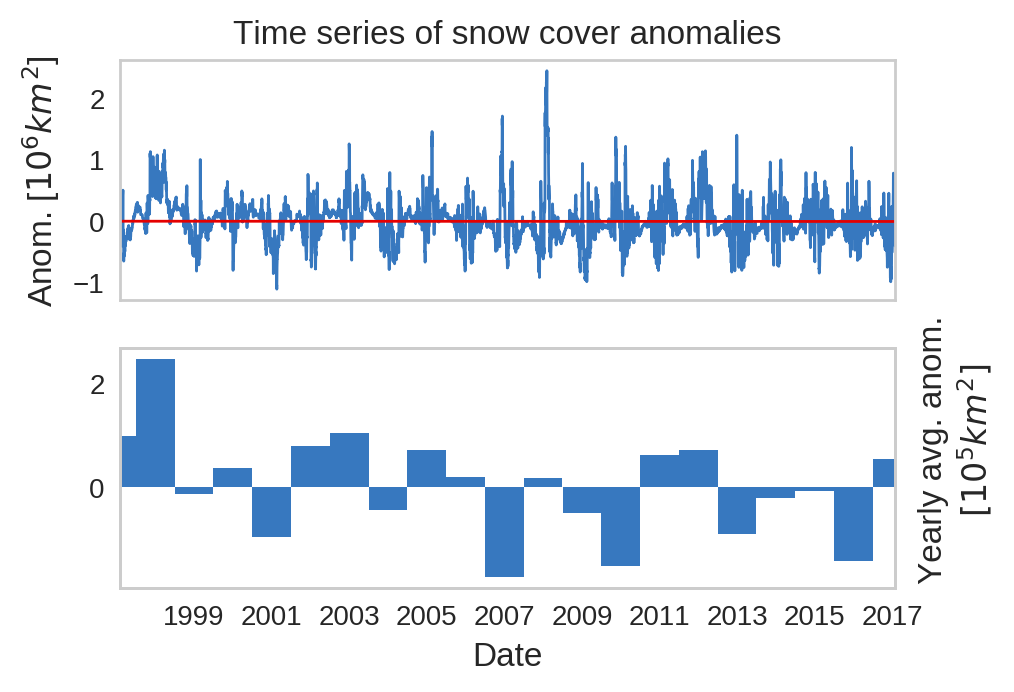

In [84]:
fig8 = ts_report.make_timeseries_subplot()

climate mean: 1.1925830630489862


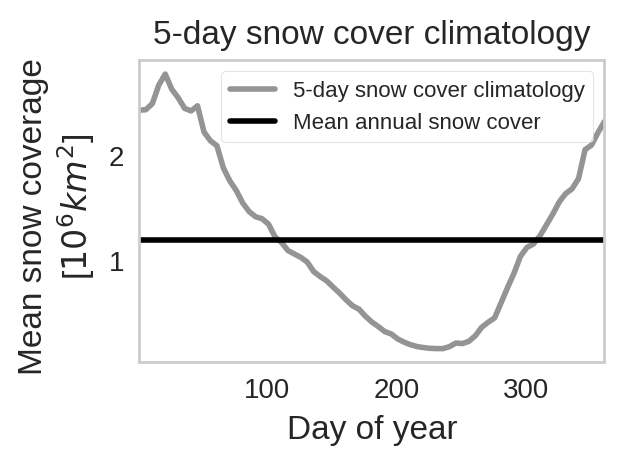

In [85]:
fig9 = ts_report.make_climate_plot(bw=True)

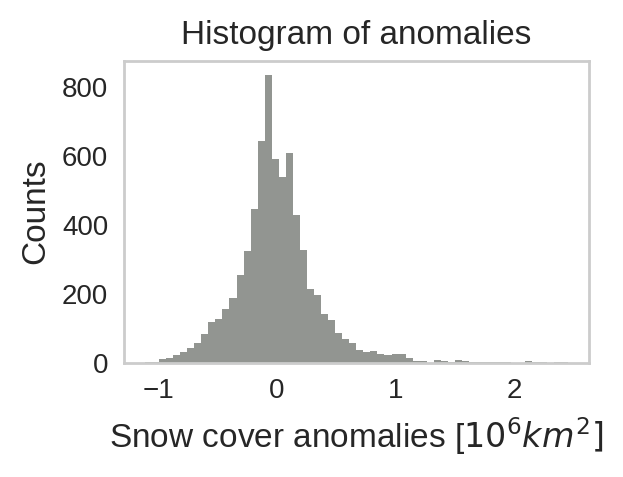

In [86]:
fig10 = ts_report.make_histogram(bw=True)

# Time series section

In [87]:
dfSTL = pd.read_csv('24km_stl.csv')
dfSTL.index = pd.to_datetime(dfSTL['timestamp'],
                             format='%Y-%m-%d')

In [88]:
dfSTL.columns

Index(['seasonal', 'trend', 'remainder', 'timestamp'], dtype='object')

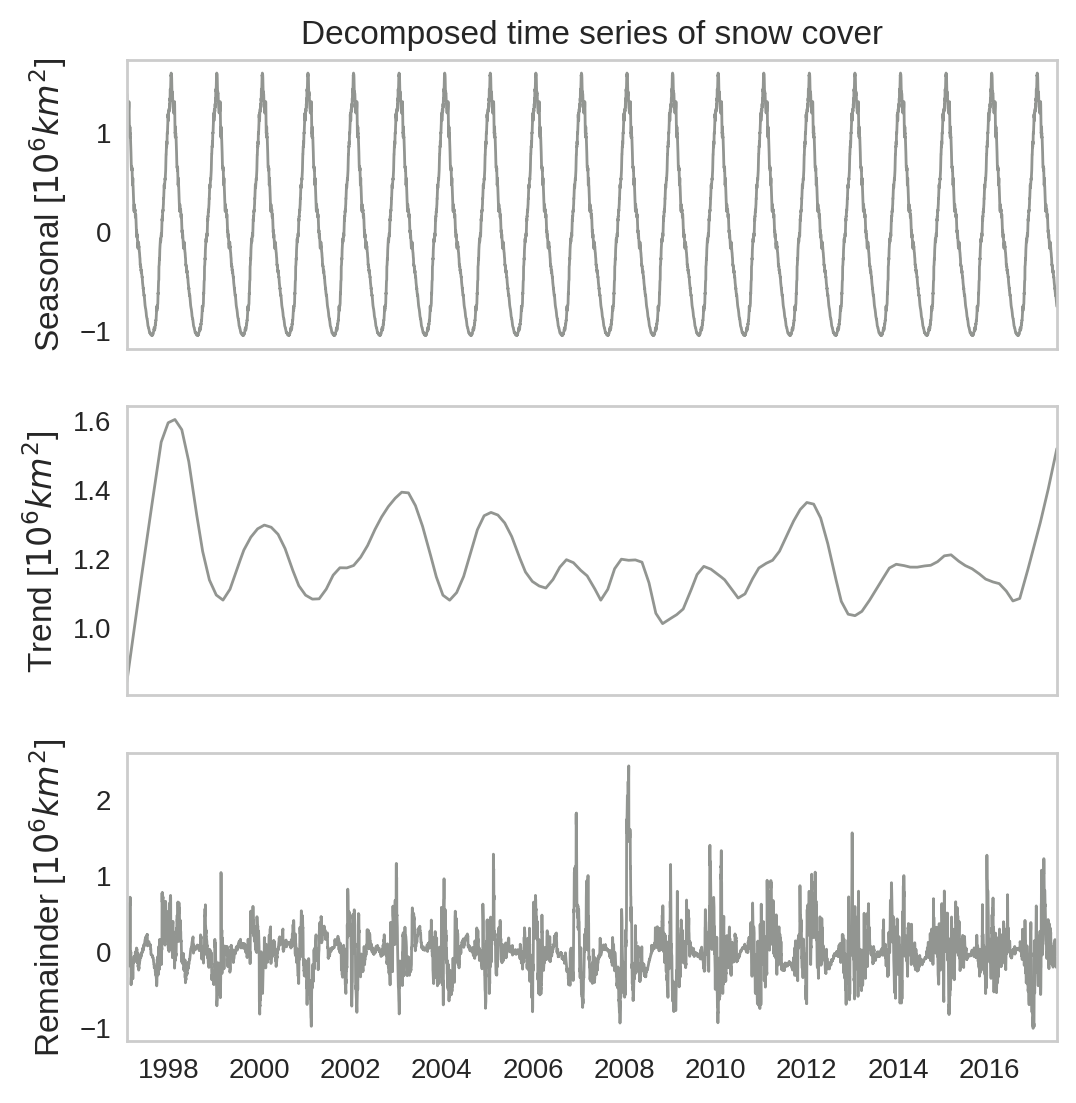

In [89]:
figTs, axesTs = plt.subplots(3,1,figsize=(6, 6.5), sharex = True)

axesTs[0].plot(dfSTL.index.values, dfSTL['seasonal'].values/(10**6), linewidth = 1)
axesTs[0].set_title('Decomposed time series of snow cover')
axesTs[0].set_ylabel(r'Seasonal [$10^{6} km^{2}$]')
axesTs[0].set_xlim([dfSTL.index.min(),dfSTL.index.max()])

axesTs[1].plot(dfSTL.index.values, dfSTL['trend'].values/(10**6), linewidth = 1)
axesTs[1].set_ylabel(r'Trend [$10^{6} km^{2}$]')

axesTs[2].plot(dfSTL.index.values, dfSTL['remainder'].values/(10**6), linewidth = 1)
axesTs[2].set_ylabel(r'Remainder [$10^{6} km^{2}$]')

#axesTs.yaxis.set_ticks([])
#axesTs.yaxis.set_label_coords(1.03,.6)
#axesTs[1].grid(False)
#axesTs[1].set_xlabel(r'Date')
#plt.savefig(os.path.join(self.series_name,self.series_name+'-averaged.png'),bbox_inches='tight')

# make continuous time series climate...

In [90]:
ts_report.df_cont_out.columns

Index(['coverage', 'dayofyear', 'mean', 'std', 'counts', 'z', 'perc_diff',
       'anom', 'timestamp'],
      dtype='object')

In [91]:
ts_report.df_cont_out['anom'].fillna(0, inplace=True)
ts_report.df_cont_out['perc_diff'].fillna(0, inplace=True)
ts_report.df_cont_out['z'].fillna(0, inplace=True)
ts_report.df_cont_out.drop('timestamp', axis=1, inplace=True)
#ts_report.df_cont_out.to_csv('df_cont_out.csv')

In [92]:
def make_continuous_climate_df():
    dates = pd.date_range(ts_report.df['timestamp'].min(), ts_report.df['timestamp'].max())
    datesDf = pd.DataFrame({'timestamp':dates})
    print(datesDf.shape)
    print(ts_report.df.shape)
    ts_cont = pd.merge(ts_report.df, datesDf, on='timestamp', how='right')
    ts_cont.index = ts_cont['timestamp']
    ts_cont.sort_index(inplace=True)
    ts_cont['dayofyear'] = ts_cont.index.dayofyear
    print(ts_cont.shape)
    ts_continuous = pd.merge(ts_cont, ts_report.clim, on='dayofyear', how='left')
    print(ts_continuous.shape)
    return ts_continuous

In [93]:
def make_continuous_climate_df(self):
    dates = pd.date_range(self.df['timestamp'].min(), self.df['timestamp'].max())
    ddf = pd.DataFrame({'timestamp':dates})
    df = pd.merge(ts_report.df, ddf, on='timestamp', how='right')
    df.index = df['timestamp']
    df.sort_index(inplace=True)
    df['dayofyear'] = df.index.dayofyear
    print(ts_cont.shape)
    df = pd.merge(df, self.clim, on='dayofyear', how='left')
    return df

In [94]:
ts_continuous = pd.merge(ts_report.df, ts_report.clim, on='dayofyear', how='outer')

In [95]:
ts_continuous.index = ts_continuous['timestamp']
ts_continuous.sort_index(inplace=True)
ts_continuous

perc coverage      coverage  dayofyear  is_leap_year  timestamp  \
timestamp                                                                     
1997-02-04       0.286795  2.312373e+06         35         False 1997-02-04   
1997-02-05       0.292160  2.355629e+06         36         False 1997-02-05   
1997-02-06       0.292160  2.355629e+06         37         False 1997-02-06   
1997-02-07       0.284735  2.295769e+06         38         False 1997-02-07   
1997-02-08       0.287602  2.318882e+06         39         False 1997-02-08   
1997-02-09       0.329224  2.654469e+06         40         False 1997-02-09   
1997-02-10       0.331795  2.675199e+06         41         False 1997-02-10   
1997-02-11       0.332292  2.679209e+06         42         False 1997-02-11   
1997-02-12       0.320583  2.584800e+06         43         False 1997-02-12   
1997-02-13       0.320583  2.584800e+06         44         False 1997-02-13   
1997-02-14       0.319154  2.573279e+06         45         False 1997-02-14   
1997-02-16       0.321458  2.591858e+06         47         False 1997-02-16   
1997-02-17       0.271973  2.192872e+06         48         False 1997-02-17   
1997-02-18       0.262956  2.120164e+06         49         False 1997-02-18   
1997-02-19       0.256854  2.070966e+06         50         False 1997-02-19   
1997-02-20       0.252428  2.035277e+06         51         False 1997-02-20   
1997-02-21       0.247279  1.993762e+06         52         False 1997-02-21   
1997-02-22       0.247279  1.993762e+06         53         False 1997-02-22   
1997-02-23       0.245177  1.976818e+06         54         False 1997-02-23   
1997-02-24       0.245177  1.976818e+06         55         False 1997-02-24   
1997-02-25       0.245177  1.976818e+06         56         False 1997-02-25   
1997-02-26       0.244576  1.971970e+06         57         False 1997-02-26   
1997-02-27       0.244576  1.971970e+06         58         False 1997-02-27   
1997-02-28       0.317692  2.561490e+06         59         False 1997-02-28   
1997-03-01       0.317692  2.561490e+06         60         False 1997-03-01   
1997-03-02       0.322304  2.598679e+06         61         False 1997-03-02   
1997-03-03       0.322304  2.598679e+06         62         False 1997-03-03   
1997-03-04       0.254723  2.053785e+06         63         False 1997-03-04   
1997-03-05       0.218734  1.763610e+06         64         False 1997-03-05   
1997-03-06       0.215628  1.738569e+06         65         False 1997-03-06   
...                   ...           ...        ...           ...        ...   
2016-12-30       0.232406  1.873843e+06        365          True 2016-12-30   
2016-12-31       0.236077  1.903447e+06        366          True 2016-12-31   
2017-01-01       0.265274  2.138856e+06          1         False 2017-01-01   
2017-01-02       0.295946  2.386161e+06          2         False 2017-01-02   
2017-01-03       0.296851  2.393458e+06          3         False 2017-01-03   
2017-01-04       0.269997  2.176934e+06          4         False 2017-01-04   
2017-01-05       0.277199  2.235004e+06          5         False 2017-01-05   
2017-01-06       0.282082  2.274373e+06          6         False 2017-01-06   
2017-01-07       0.301038  2.427211e+06          7         False 2017-01-07   
2017-01-08       0.280102  2.258411e+06          8         False 2017-01-08   
2017-01-09       0.342085  2.758172e+06          9         False 2017-01-09   
2017-01-10       0.352471  2.841907e+06         10         False 2017-01-10   
2017-01-11       0.365489  2.946872e+06         11         False 2017-01-11   
2017-01-12       0.406790  3.279870e+06         12         False 2017-01-12   
2017-01-13       0.405767  3.271628e+06         13         False 2017-01-13   
2017-01-14       0.341297  2.751815e+06         14         False 2017-01-14   
2017-01-15       0.339823  2.739928e+06         15         False 2017-01-15   
2017-01-16       0.339553  2.737756e+06         16         Fal

In [96]:
ts_continuous.to_csv('24kmCont.csv')

In [45]:
ts_report.clim.shape

(365, 7)

In [46]:
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap


snow = '#FEFEFE'
cmap1 = LinearSegmentedColormap.from_list("my_colormap", (snow, snow), N=6, gamma=1)

def makeMap(proj='merc'):
    plt.cla()
    coords = {'lower_lat':25,'upper_lat':45,'lower_long':65,'upper_long':105} #set as lower and upper bounds for lat and long
    center = ((coords['upper_long']-coords['lower_long'])/2+coords['lower_long'],(coords['upper_lat']-coords['lower_lat'])/2+coords['lower_lat'])
    
    m = Basemap(projection=proj,
                llcrnrlat=coords['lower_lat'],
                urcrnrlat=coords['upper_lat'],
                llcrnrlon=coords['lower_long'],
                urcrnrlon=coords['upper_long'],
                lat_ts=20,
                resolution='c', 
                lat_0 = center[1],
                lon_0 = center[0])
    m.etopo()
    parallels = np.arange(0., 81, 10)
    meridians = np.arange(10, 351, 10)
    m.drawparallels(parallels, labels =[False, True, True, False])
    m.drawmeridians(meridians, labels =[True, False, False, True])
    return m

def snow_and_ice(x):
    if x==4 or x==3:
        x=1 
    else: 
        x=0
    return x


def make_plot_from_col(df, col, plot_dir):
    year, day = df[col].name.split("_")
    date = datetime.datetime(int(year), 1, 1) + datetime.timedelta(int(day))
    title_string = date.strftime('%Y-%m-%d')
    m=makeMap('merc')
    data = df[col].apply(snow_and_ice)
    grid_z0 = griddata(points, data.values, (grid_x, grid_y), method='linear') #can be nearest, linear, or cubic interpolation
    grid_z0[ grid_z0 != 1 ] = np.nan
    m.contourf(grid_x, grid_y,grid_z0, latlon=False, cmap = cmap1, alpha=1)
    plt.title(title_string,fontsize=16, color = "black")
    plt.show()

def make_contour_grid(lat,lon, data):
    m=makeMap()
    x, y = m(lon,lat)
    points = np.transpose(np.array([x,y]))
    grid_x, grid_y = np.mgrid[min(x):max(x):3000j, min(y):max(y):3000j]
    points = np.transpose(np.array([x,y]))
    grid_z = griddata(points, data.values, (grid_x, grid_y), method='linear')
    grid_z[ grid_z != 1 ] = np.nan
    return (grid_x, grid_y, grid_z)

In [47]:
#make contour grids
output_dir = os.path.join(os.getcwd())
data_dir = os.path.join(os.getcwd(),os.pardir, 'tibet_snow_man', 'data')
lat_long_area_filename_24km = 'tibet_lat_long_centroids_area_24km.csv'
lat_long_area_filename_4km = 'tibet_lat_long_centroids_area_4km.csv'
col_to_plot = '2015_001'
filename_24km = '24_km.csv'
filename_4km = '4_km.csv'
col_to_plot = '2015_001'

df_to_plot_24km = pd.read_csv(filename_24km)

data_24km = df_to_plot_24km[col_to_plot].apply(snow_and_ice)
df_lat_long_24km = pd.read_csv(os.path.join(data_dir,lat_long_area_filename_24km))
lat_24km = df_lat_long_24km['lat'].values
lon_24km = df_lat_long_24km['long'].values
(grid_x_L, grid_y_L, grid_zL) = make_contour_grid(lat_24km, lon_24km, data_24km)

df_to_plot_4km = pd.read_csv(os.path.join(os.getcwd(), filename_4km))

data_4km = df_to_plot_4km[col_to_plot].apply(snow_and_ice)
df_lat_long_4km = pd.read_csv(os.path.join(data_dir,lat_long_area_filename_4km))
lat_4km = df_lat_long_4km['lat'].values
lon_4km = df_lat_long_4km['long'].values
(grid_x_R, grid_y_R, grid_zR) = make_contour_grid(lat_4km, lon_4km, data_4km)

KeyError: '2015_001'

NameError: name 'grid_x_L' is not defined

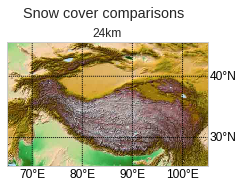

In [48]:
#%pylab inline
coords = {'lower_lat':25,'upper_lat':45,'lower_long':65,'upper_long':105} #set as lower and upper bounds for lat and long
center = ((coords['upper_long']-coords['lower_long'])/2+coords['lower_long'],(coords['upper_lat']-coords['lower_lat'])/2+coords['lower_lat'])

rcParams['figure.figsize'] = (4,5)
fig11 = plt.figure()
plt.suptitle('Snow cover comparisons')
axes11L = fig11.add_subplot(211)
axes11L.set_title('24km', fontsize=12)

mapL = Basemap(projection='merc',
            llcrnrlat=coords['lower_lat'],
            urcrnrlat=coords['upper_lat'],
            llcrnrlon=coords['lower_long'],
            urcrnrlon=coords['upper_long'],
            lat_ts=20,
            resolution='c', 
            lat_0 = center[1],
            lon_0 = center[0])
mapL.etopo()
parallels = np.arange(0., 81, 10)
meridians = np.arange(10, 351, 10)
mapL.drawparallels(parallels, labels =[False, True, True, False])
mapL.drawmeridians(meridians, labels =[True, False, False, True])

mapL.contourf(grid_x_L, grid_y_L,grid_zL, latlon=False, cmap = cmap1, alpha=1)
axes11R = fig11.add_subplot(212)
axes11R.set_title('4km', fontsize=12)
mapR = Basemap(projection='merc',
            llcrnrlat=coords['lower_lat'],
            urcrnrlat=coords['upper_lat'],
            llcrnrlon=coords['lower_long'],
            urcrnrlon=coords['upper_long'],
            lat_ts=20,
            resolution='c', 
            lat_0 = center[1],
            lon_0 = center[0])
mapR.etopo()
parallels = np.arange(0., 81, 10)
meridians = np.arange(10, 351, 10)
mapR.drawparallels(parallels, labels =[False, True, True, False])
mapR.drawmeridians(meridians, labels =[True, False, False, True])
mapR.contourf(grid_x_R, grid_y_R,grid_zR, latlon=False, cmap = cmap1, alpha=1)

NameError: name 'grid_x_L' is not defined

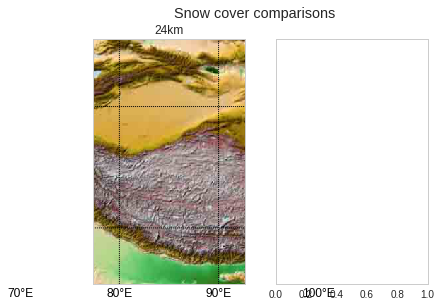

In [49]:
#%pylab inline
coords = {'lower_lat':25,'upper_lat':45,'lower_long':65,'upper_long':105} #set as lower and upper bounds for lat and long
center = ((coords['upper_long']-coords['lower_long'])/2+coords['lower_long'],(coords['upper_lat']-coords['lower_lat'])/2+coords['lower_lat'])



rcParams['figure.figsize'] = (6,4.5)
fig11, axes11 = plt.subplots(nrows=1, ncols=2, sharey=True)
plt.suptitle('Snow cover comparisons')
axes11[0].set_title('24km')

mapL = Basemap(projection='merc',
            llcrnrlat=coords['lower_lat'],
            urcrnrlat=coords['upper_lat'],
            llcrnrlon=coords['lower_long'],
            urcrnrlon=coords['upper_long'],
            lat_ts=20,
            resolution='c', 
            lat_0 = center[1],
            lon_0 = center[0],
            ax=axes11[0])
mapL.etopo()
parallels = np.arange(0., 81, 10)
meridians = np.arange(10, 351, 10)
mapL.drawparallels(parallels, labels =[False, True, True, False])
mapL.drawmeridians(meridians, labels =[True, False, False, True])

mapL.contourf(grid_x_L, grid_y_L,grid_zL, latlon=False, cmap = cmap1, alpha=1)

axes11[1].set_title('4km')
mapR = Basemap(projection='merc',
            llcrnrlat=coords['lower_lat'],
            urcrnrlat=coords['upper_lat'],
            llcrnrlon=coords['lower_long'],
            urcrnrlon=coords['upper_long'],
            lat_ts=20,
            resolution='c', 
            lat_0 = center[1],
            lon_0 = center[0],
            ax=axes11[1])
mapR.etopo()
parallels = np.arange(0., 81, 10)
meridians = np.arange(10, 351, 10)
mapR.drawparallels(parallels, labels =[False, True, True, False])
mapR.drawmeridians(meridians, labels =[True, False, False, True])
mapR.contourf(grid_x_R, grid_y_R,grid_zR, latlon=False, cmap = cmap1, alpha=1)

In [50]:
pd.read_csv(os.path.join(os.getcwd(), filename_24km))

timestamp  perc coverage      coverage
0     1997-02-04       0.286795  2.312375e+06
1     1997-02-05       0.292160  2.355631e+06
2     1997-02-06       0.292160  2.355631e+06
3     1997-02-07       0.285045  2.298265e+06
4     1997-02-08       0.287911  2.321377e+06
5     1997-02-09       0.329533  2.656964e+06
6     1997-02-10       0.332104  2.677695e+06
7     1997-02-11       0.332601  2.681705e+06
8     1997-02-12       0.320892  2.587295e+06
9     1997-02-13       0.320892  2.587295e+06
10    1997-02-14       0.319463  2.575774e+06
11    1997-02-16       0.321768  2.594354e+06
12    1997-02-17       0.272283  2.195367e+06
13    1997-02-18       0.263265  2.122659e+06
14    1997-02-19       0.257163  2.073461e+06
15    1997-02-20       0.252737  2.037772e+06
16    1997-02-21       0.247588  1.996257e+06
17    1997-02-22       0.247588  1.996257e+06
18    1997-02-23       0.245486  1.979313e+06
19    1997-02-24       0.245486  1.979313e+06
20    1997-02-25       0.245486  1.979313e+06
21    1997-02-26       0.244885  1.974465e+06
22    1997-02-27       0.244885  1.974465e+06
23    1997-02-28       0.318001  2.563986e+06
24    1997-03-01       0.318001  2.563986e+06
25    1997-03-02       0.322613  2.601174e+06
26    1997-03-03       0.322613  2.601174e+06
27    1997-03-04       0.255032  2.056280e+06
28    1997-03-05       0.219043  1.766105e+06
29    1997-03-06       0.215937  1.741063e+06
...          ...            ...           ...
7385  2017-05-28       0.110421  8.903006e+05
7386  2017-05-29       0.118341  9.541632e+05
7387  2017-05-30       0.120208  9.692122e+05
7388  2017-05-31       0.121882  9.827141e+05
7389  2017-06-01       0.127808  1.030489e+06
7390  2017-06-02       0.134596  1.085224e+06
7391  2017-06-03       0.130548  1.052583e+06
7392  2017-06-04       0.129429  1.043560e+06
7393  2017-06-05       0.133418  1.075726e+06
7394  2017-06-06       0.126082  1.016579e+06
7395  2017-06-07       0.120585  9.722511e+05
7396  2017-06-08       0.109690  8.844125e+05
7397  2017-06-09       0.121297  9.779988e+05
7398  2017-06-10       0.110855  8.938065e+05
7399  2017-06-11       0.132982  1.072209e+06
7400  2017-06-12       0.103850  8.373247e+05
7401  2017-06-13       0.108839  8.775456e+05
7402  2017-06-14       0.094269  7.600717e+05
7403  2017-06-15       0.083436  6.727288e+05
7404  2017-06-16       0.086879  7.004918e+05
7405  2017-06-17       0.094019  7.580555e+05
7406  2017-06-18       0.091877  7.407872e+05
7407  2017-06-19       0.085090  6.860648e+05
7408  2017-06-20       0.078615  6.338572e+05
7409  2017-06-21       0.075790  6.110829e+05
7410  2017-06-22       0.073719  5.943825e+05
7411  2017-06-23       0.073311  5.910903e+05
7412  2017-06-24       0.080983  6.529539e+05
7413  2017-06-25       0.080983  6.529539e+05
7414  2017-06-26       0.082752  6.672125e+05

[7415 rows x 3 columns]

In [97]:
fig_grid_name = 'lat_diff_vs_lat.png'
fig0_name = 'dry_planet_24km.png'
fig1_name = 'zoomed_earth.png'
fig2_name = 'basemap.png'
fig3_name = 'areas_of_tibet_grid'
fig3p2_name = 'areas_of_tibet_grid_ii'
fig4_name = 'areas_of_sub_section_i'
fig5_name = 'areas_of_sub_section_ii'
fig6_name = 'ts-2-res.png'
fig7_name = 'ts-compare.png'
fig8_name = 'tibet-24-anomalies-ts.png'
fig9_name = 'tibet-24-climate.png'
fig10_name = 'tibet-24-anomalies-hist.png'
fig11_name = 'tibet-snow-res-compare.png'
figTS_name = 'tibet-24-stl.png'

fig_dir = 'paper figures'

In [100]:
figuresDir = os.path.join(os.getcwd(),os.pardir,'figures')

#fig_grid.savefig(os.path.join(figuresDir,fig_grid_name),bbox_inches="tight")
fig0.savefig(os.path.join(figuresDir, fig0_name),bbox_inches="tight")
fig1.savefig(os.path.join(figuresDir, fig1_name),bbox_inches="tight")
fig2.savefig(os.path.join(figuresDir, fig2_name),bbox_inches="tight")
fig6.savefig(os.path.join(figuresDir, fig6_name),bbox_inches="tight")
fig7.savefig(os.path.join(figuresDir, fig7_name),bbox_inches="tight")
fig8.savefig(os.path.join(figuresDir, fig8_name),bbox_inches="tight")
fig9.savefig(os.path.join(figuresDir, fig9_name),bbox_inches="tight")
fig10.savefig(os.path.join(figuresDir, fig10_name),bbox_inches="tight")
fig11.savefig(os.path.join(figuresDir, fig11_name),bbox_inches="tight")
figTS.savefig(os.path.join(figuresDir, figTS_name), bbox_inches="tight")

NameError: name 'fig0' is not defined

In [101]:
fig6.savefig(os.path.join(figuresDir, fig6_name),bbox_inches="tight")
fig7.savefig(os.path.join(figuresDir, fig7_name),bbox_inches="tight")
fig8.savefig(os.path.join(figuresDir, fig8_name),bbox_inches="tight")
fig9.savefig(os.path.join(figuresDir, fig9_name),bbox_inches="tight")
fig10.savefig(os.path.join(figuresDir, fig10_name),bbox_inches="tight")
fig11.savefig(os.path.join(figuresDir, fig11_name),bbox_inches="tight")
figTS.savefig(os.path.join(figuresDir, figTS_name), bbox_inches="tight")

FileNotFoundError: [Errno 2] No such file or directory: '/home/tyler/Desktop/thesis/ch2Code/../figures/ts-2-res.png'

In [ ]:
fig9.savefig(os.path.join(os.getcwd(),os.pardir,os.pardir, 'data',fig_dir,fig9_name),bbox_inches="tight")
fig10.savefig(os.path.join(os.getcwd(),os.pardir,os.pardir, 'data',fig_dir,fig10_name),bbox_inches="tight")

In [119]:
figuresDir = os.path.join(os.getcwd(),os.pardir,'figures')
figTs.savefig(os.path.join(figuresDir, figTS_name), bbox_inches="tight")